In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats
from astropy import stats as astrostats

import octopus as oct

In [2]:
import astropy

In [5]:
# Import data
T4T5c_R_deg = np.load('T4T5c_R_deg.npy')
T4T5d_R_deg = np.load('T4T5d_R_deg.npy')
T4T5d_T4T5c_block_R_deg = np.load('T4T5d_T4T5c_block_R_deg.npy')

rotations = [0,45,90,135,180,225,270,315,360]

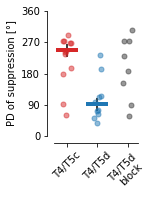

In [6]:
# Make Scatter Plot of R_deg

pos = [0,1,2]

fig = plt.figure(figsize = (0.5*len(pos), 2.3))

ax = fig.add_subplot(111)
w = 0.6
wb = 0.6
data = [np.radians(T4T5c_R_deg), np.radians(T4T5d_R_deg), np.radians(T4T5d_T4T5c_block_R_deg)]
colors=['C3', 'C0', '0.2']

for j in range (len(data)-1):
    ax.plot([pos[j]-w/2, pos[j]+w/2],[stats.circmean(data[j]),stats.circmean(data[j])],
            color=colors[j], linestyle='-', linewidth = 4)
    ax.errorbar(pos[j],stats.circmean(data[j]),yerr=[stats.circstd(data[j])/(np.sqrt(len(data[j])))], color='k',zorder = 0)    
    
for j in range (len(data)):    
    for i in range(len(data[j])):
        ax.scatter(pos[j] + np.random.random(1) * w/2 - w/4, data[j][i], s=25, color=colors[j], alpha=0.5, zorder = 2) 
   
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_position(('outward', 7))
ax.spines['bottom'].set_position(('outward', 7))
ax.set_xticks(pos)
ax.set_xticklabels(('T4/T5c', 'T4/T5d', 'T4/T5d \nblock'), rotation=45, size=10)
ax.set_yticks(np.radians(rotations[::2]))
ax.set_yticklabels(rotations[::2])
ax.set_ylabel(u'PD of suppression [°]', size=10)
plt.ylim([0,np.pi*2+0.01])
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#Fig5_PD_of_Inhibition.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

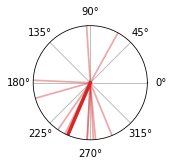

In [17]:
#POLAR PLOT
fig = plt.figure(figsize = (2.1,2.1))
for i in range(len(T4T5c_R_deg)):
    plt.polar([0,np.radians(T4T5c_R_deg[i])],[0,1],linewidth=1.75, color='C3', alpha=0.4)
plt.polar([0,stats.circmean(np.radians(T4T5c_R_deg))],[0,1],linewidth=3.5, color='C3')
plt.yticks([])
#plt.xticks([0])
plt.ylim([0,1])
plt.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#Fig5_T4T5c_polar_wo_arrow.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

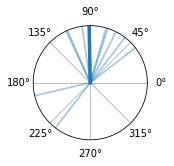

In [18]:
#POLAR PLOT
fig = plt.figure(figsize = (2.1,2.1))
for i in range(len(T4T5d_R_deg)):    
    plt.polar([0,np.radians(T4T5d_R_deg[i])],[0,1],linewidth=1.75, color='C0', alpha=0.4)
plt.polar([0,stats.circmean(np.radians(T4T5d_R_deg))],[0,1],linewidth=3.5, color='C0')
plt.yticks([])
#plt.xticks([0])
plt.ylim([0,1])
plt.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#Fig5_T4T5d_polar_wo_arrow.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

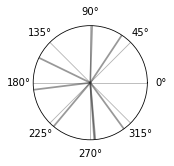

In [19]:
#POLAR PLOT
fig = plt.figure(figsize = (2.1,2.1))
for i in range(len(T4T5d_T4T5c_block_R_deg)):
    plt.polar([0,np.radians(T4T5d_T4T5c_block_R_deg[i])],[0,1],linewidth=1.75, color='0.2', alpha=0.5)
#plt.polar([0,stats.circmean(np.radians(T4T5_D_TNT_R_deg))],[0,1],linewidth=4, color='k')
plt.yticks([])
plt.ylim([0,0.95])
plt.tick_params(axis='both', which='major', labelsize=10)

bbox_inches = 'tight'
#plt.savefig('C:\\Users\\gammer\\Desktop\\DATA Surface\\LPi Opponency\\plots_LPi_ms\\\
#Fig5_T4T5d_T4T5cTNT_polar.pdf',bbox_inches='tight', dpi=600, transparent=True)

plt.show()

In [15]:
print(stats.shapiro(T4T5c_R_deg))
print(stats.shapiro(T4T5d_R_deg))
print(stats.shapiro(T4T5d_T4T5c_block_R_deg))

(0.8690879344940186, 0.09754662960767746)
(0.8260365128517151, 0.018810812383890152)
(0.931892991065979, 0.5334630608558655)


In [20]:
print(astrostats.rayleightest(np.radians(T4T5c_R_deg)))
print(astrostats.rayleightest(np.radians(T4T5d_R_deg)))
print(astrostats.rayleightest(np.radians(T4T5d_T4T5c_block_R_deg)))

0.028338216814149362
0.022866569716960078
0.6618565819602494
